In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Creating Arrays

In [2]:
a1 = np.array([4,6,8,2])
a2 = np.zeros(10)
a3 = np.ones(4)
a4 = np.random.random(10)
a5 = np.random.randn(10)
a6 = np.linspace(0, 10, 100)
a7 = np.arange(0, 10, 0.2)

# Array Operations

In [3]:
a1*2

array([ 8, 12, 16,  4])

In [4]:
2*a1>10

array([False,  True,  True, False])

In [5]:
1/a4 + a4

array([2.30883839, 4.84242861, 2.07702141, 3.54285895, 5.76150567,
       2.31938559, 2.04106535, 2.54121513, 2.77255371, 3.16262467])

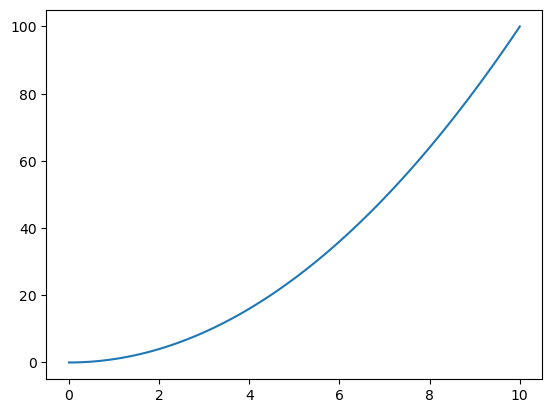

In [6]:
plt.plot(a6, a6**2)
plt.show()

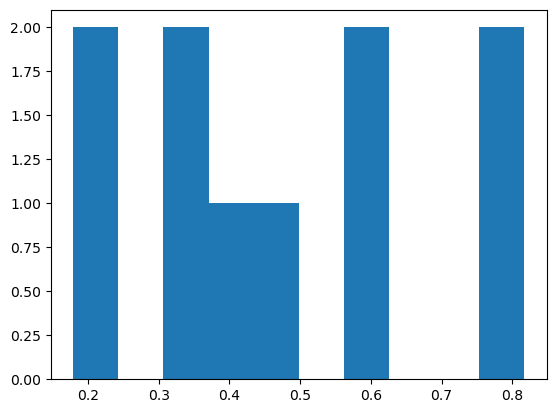

In [7]:
plt.hist(a4)
plt.show()

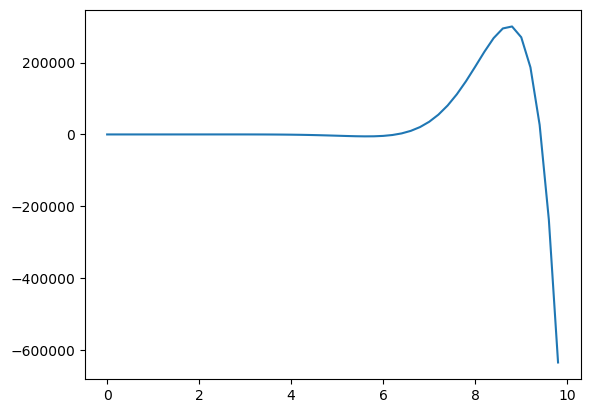

In [8]:
def f(x):
    return x**2 * np.sin(x) / np.exp(-x)

plt.plot(a7, f(a7))

List of many many mathematical functions here:

https://numpy.org/doc/stable/reference/routines.math.html

# Array Indexing/Slicing

In [9]:
a1 = np.array([2,4,6,8,10])

In [10]:
a1[2]

6

In [11]:
a1[2:]

array([ 6,  8, 10])

In [12]:
a1[:-2]

array([2, 4, 6])

In [13]:
a1[::2]

array([ 2,  6, 10])

In [14]:
a1>3

array([False,  True,  True,  True,  True])

In [15]:
a1[a1>3]

array([ 4,  6,  8, 10])

In [16]:
names = np.array(['Jim', 'Luke', 'Josh', 'Pete'])
first_letter_j = np.vectorize(lambda s: s[0])(names)=='J'
names[first_letter_j]

array(['Jim', 'Josh'], dtype='<U4')

In [17]:
a1%4

array([2, 0, 2, 0, 2], dtype=int32)

In [18]:
a1%4==0

array([False,  True, False,  True, False])

In [19]:
a1[a1%4==0]

array([4, 8])

# Calculus / Statistical Functions

In [21]:
a1 = 2*np.random.randn(10000) + 10

Mean, standard deviation, and percentiles of arrays:

In [22]:
np.mean(a1)

10.013018050604778

In [23]:
np.std(a1)

1.9998700940339496

In [24]:
np.percentile(a1, 80)

11.705707617468939

Integrals and derivatives

In [25]:
x = np.linspace(1, 10, 100)
y = 1/x**2 * np.sin(x)
dydx = np.gradient(y,x)
y_integral = np.cumsum(y) * (x[1]-x[0])

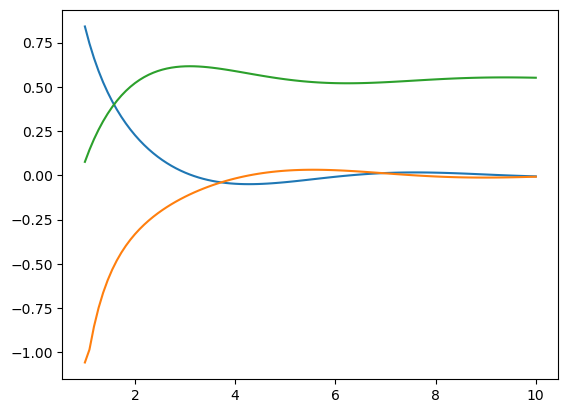

In [26]:
plt.plot(x,y)
plt.plot(x,dydx)
plt.plot(x,y_integral)

# Examples

## Question 1:

Let $y=e^{-x/10} \sin(x)$. Consider 10000 $x$ intervals in the range $[0,10]$

1. Plot the function $y$ vs. $x$ in the range $[0, 10]$. 
2. Compute the mean and standard deviation of $y$ for $x$ values in $[4,7]$
3. For $x$ in the range $[4,7]$, find the value $y_m$ such that 80% of $y$ values are less than $y_m$
4. Plot $dy/dx$ vs $x$
5. Find the locations where $dy/dx=0$ 

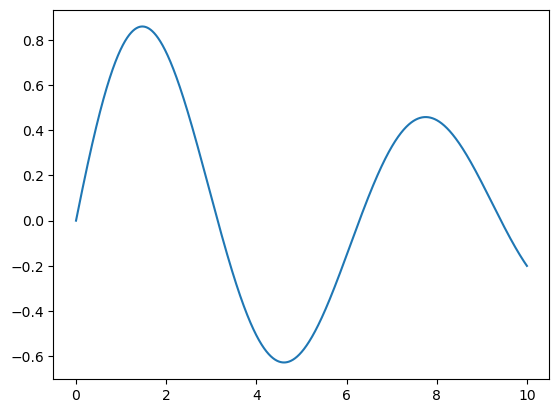

In [27]:
#1 
N = 10000
x = np.linspace(0, 10, N+1)
y = np.exp(-x/10) * np.sin(x)
plt.plot(x,y)

In [29]:
#2
np.mean(y[(x>=4)*(x<=7)])
np.std(y[(x>=4)*(x<=7)])

0.31448753875085117

In [30]:
#3 
np.percentile(y[(x>=4)*(x<=7)], 80)

0.06145551274590662

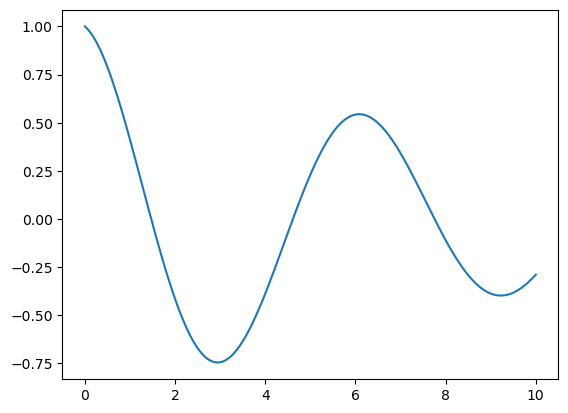

In [31]:
#4
plt.plot(x, np.gradient(y,x))

In [32]:
#5
dydx = np.gradient(y,x)
x[1:][dydx[1:] * dydx[:-1] < 0]

array([1.472, 4.613, 7.755])

# Question 2:

Sum together every number from 0 to 10000 except for those than can be divided by 4 or 7. Do this in one line of code

In [33]:
np.arange(0,10001,1)[(np.arange(0,10001,1)%4!=0)*(np.arange(0,10001,1)%7!=0)].sum()

32147142

## Question 3:

Consider the flower petal $r(\theta) = 1+\frac{3}{4}\sin(3 \theta)$ for $0 \leq \theta \leq 2 \pi$

1. Make a plot of the flower (find x and y points)
2. Compute the area using the calculus formula $A = \int_{0}^{2\pi} \frac{1}{2} r^2 d\theta$
3. Compute the arclength using the calculus formula $L = \int_{0}^{2 \pi} \sqrt{r^2 + \left(\frac{dr}{d\theta}\right)^2} d\theta$

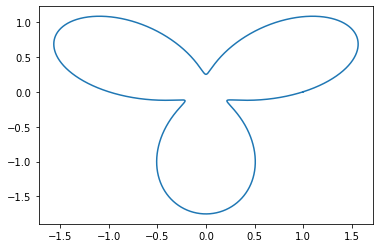

In [128]:
# 1
theta = np.linspace(0, 2*np.pi, 10000)
r = 1 + 3/4 * np.sin(3*theta)
x = r*np.cos(theta)
y = r * np.sin(theta)
plt.plot(x,y)

In [130]:
#2 
A = 1/2 * sum(r**2) * (theta[1]-theta[0])
A

4.025479778096348

In [132]:
L = sum(np.sqrt(r**2 + np.gradient(r, theta)**2)) * (theta[1]-theta[0])
L

11.626531213518831

## Question 4:

The power emitted by a blackbody is $P = A \sigma \epsilon T^4$. After measuring the temperature of a star you find that $T(t) = T_0 \frac{1}{1+e^{-kt}}$. Plot the total energy emitted by the star as a function of time using the fact that $E(t) = \int_{t'=0}^{t'=t} P(t') dt' $

In [105]:
kt = np.linspace(0, 3, 100)
P = (1/(1+np.exp(-kt)))**4
E = np.cumsum(P) * (kt[1]-kt[0])

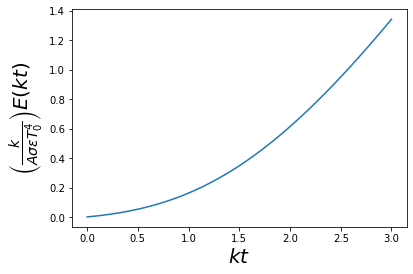

In [106]:
plt.plot(kt,E)
plt.xlabel('$kt$', fontsize=20)
plt.ylabel(r'$\left(\frac{k}{A \sigma \epsilon T_0^4}\right) E(kt)$', fontsize=20)
plt.show()

# Multi-Dimensional Arrays

Creating multi dimensional arrays

In [34]:
a1 = np.array([[4,6,4],[2,1,2],[5,6,7]])

In [35]:
a1

array([[4, 6, 4],
       [2, 1, 2],
       [5, 6, 7]])

Operations work in a similar way

In [36]:
a1*2

array([[ 8, 12,  8],
       [ 4,  2,  4],
       [10, 12, 14]])

In [37]:
2/a1

array([[0.5       , 0.33333333, 0.5       ],
       [1.        , 2.        , 1.        ],
       [0.4       , 0.33333333, 0.28571429]])

Can turn any n-dimensional array to a 1d array using `ravel()` method

In [38]:
a1.ravel()

array([4, 6, 4, 2, 1, 2, 5, 6, 7])

Boolean indexing

In [39]:
a1>5

array([[False,  True, False],
       [False, False, False],
       [False,  True,  True]])

In [40]:
a2 = np.random.randn(3,3)
a2

array([[-0.39279757,  0.319206  , -0.33429114],
       [-0.28792194, -0.5604646 ,  0.31770009],
       [ 0.37507676,  0.09373758,  0.13108642]])

In [41]:
a2[a1>5]

array([0.319206  , 0.09373758, 0.13108642])

Element indeing

In [42]:
a1

array([[4, 6, 4],
       [2, 1, 2],
       [5, 6, 7]])

In [43]:
a1[0]

array([4, 6, 4])

In [44]:
a1[:,1]

array([6, 1, 6])

In [45]:
a1[1:][:,1]

array([1, 6])

In [46]:
a1

array([[4, 6, 4],
       [2, 1, 2],
       [5, 6, 7]])

In [47]:
b1 = np.resize(a1, (6,6))
b1

array([[4, 6, 4, 2, 1, 2],
       [5, 6, 7, 4, 6, 4],
       [2, 1, 2, 5, 6, 7],
       [4, 6, 4, 2, 1, 2],
       [5, 6, 7, 4, 6, 4],
       [2, 1, 2, 5, 6, 7]])

In [169]:
b1[0:5:2][:,3:]

array([[2, 1, 2],
       [5, 6, 7],
       [4, 6, 4]])

# Dealing with 2D functions

Function in 2 dimensions. Try this...

In [48]:
x = np.linspace(0, 10, 1000)
y = np.linspace(0, 5, 500)

In [49]:
z = x**2 + y**2

ValueError: operands could not be broadcast together with shapes (1000,) (500,) 

Need to use meshgrids

In [50]:
xv, yv = np.meshgrid(x, y)

In [51]:
zv = xv**2 + yv**2

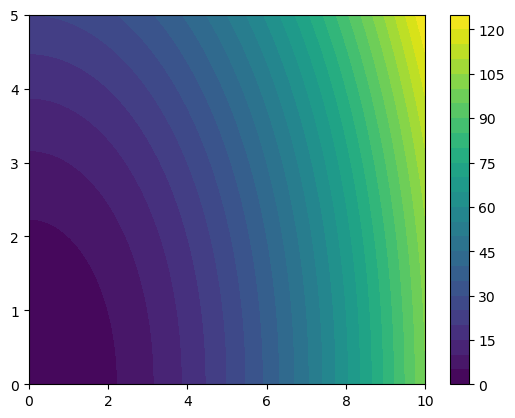

In [52]:
plt.contourf(xv, yv, zv,levels=30)
plt.colorbar()
plt.show()

# Basic Linear Algebra

## Matrix Operations

In [53]:
A = np.array([[3, 2, 1],[5,-5,4],[6,0,1]])
b1 = np.array([1,2,3])
b2 = np.array([-1,2,-5])

In [54]:
A

array([[ 3,  2,  1],
       [ 5, -5,  4],
       [ 6,  0,  1]])

In [55]:
b1

array([1, 2, 3])

In [56]:
A@b1

array([10,  7,  9])

In [57]:
A.T

array([[ 3,  5,  6],
       [ 2, -5,  0],
       [ 1,  4,  1]])

In [58]:
np.dot(b1, b2)

-12

In [54]:
np.cross(b1, b2)

array([-16,   2,   4])

## Systems of Equations

$ 3x + 2y + z = 4$

$ 5x -5y + 4z = 3$

$ 6x +z = 0$

In [59]:
A = np.array([[3, 2, 1],[5,-5,4],[6,0,1]])
c = np.array([4,3,0])

In [60]:
np.linalg.solve(A,c)

array([-0.49056604,  1.26415094,  2.94339623])

## Finding Eigenvalues

In [61]:
A = np.array([[4,2,2],[2,4,2],[2,2,4]])

In [62]:
np.linalg.eig(A)

(array([2., 8., 2.]),
 array([[-0.81649658,  0.57735027, -0.22645541],
        [ 0.40824829,  0.57735027, -0.56613852],
        [ 0.40824829,  0.57735027,  0.79259392]]))

In [63]:
w, v = np.linalg.eig(A)

In [64]:
A@v[:,1]

array([4.61880215, 4.61880215, 4.61880215])

In [132]:
w[1]*v[:,1]

array([4.61880215, 4.61880215, 4.61880215])

# Examples

## Question 1

Let $f(x,y) = e^{-(x^2+y^2)} \cdot \sin(x)$ for $-2 \leq x \leq 2$ and $-2 \leq y \leq 2$

1. Make a contour plot of $f$
2. Find the volume $|f(x,y)|$ in the specified $x$ and $y$ range
3. Find the volume $|f(x,y)|$ only in the region where $\sqrt{x^2+y^2}>0.5$ 

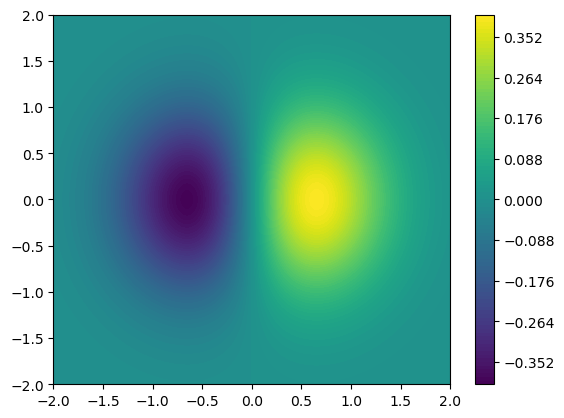

In [65]:
#1
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
xv, yv = np.meshgrid(x, y)
f = np.exp(-xv**2-yv**2) * np.sin(xv)
plt.contourf(xv,yv,f, levels=100)
plt.colorbar()

In [141]:
#2
sum(np.abs(f.ravel())) * np.diff(x)[0] * np.diff(y)[0]

1.4861858145125453

In [142]:
# 3
sum(np.abs(f[xv**2+yv**2>0.25].ravel())) * np.diff(x)[0] * np.diff(y)[0]

1.344765293020408

## Question 2

After examining a circuit full of resistors, you find that the voltage at 4 specified points is given by

$ 3V_1 + 2V_2 + 3V_3 + 10V_4 = 4$

$ 2V_1 - 2V_2 + 5V_3 + 8V_4 = 1$

$ 3V_1 + 3V_2 + 4V_3 + 9V_4 = 3$

$ 3V_1 + 4V_2 - 3V_3 - 7V_4 = 2$

Find all the voltages

## Question 3 (tougher)

An electric field is given by $\vec{E}(z,t) = E_0 \cos (z-t) \hat{x} + 2E_0 \cos(z-t+\pi/2) \hat{y}$. 

1. Find the magnetic field for all $z \in [0,4\pi]$ and $t \in [0,10]$ using $c\vec{B}(z,t) = \hat{z} \times \vec{E}(z,t)$
2. Compute the Poynting vector $\vec{S} = \vec{E} \times \vec{B}$ for all $z$ and $t$

In [66]:
z = np.linspace(0, 4*np.pi, 100)
t = np.linspace(0, 10, 100)

tv, zv = np.meshgrid(t, z)

Ex = np.cos(zv-tv)
Ey = 2*np.cos(zv-tv+np.pi/2)
Ez = 0*zv

$E_x$ as function of $t$ at $z=0$

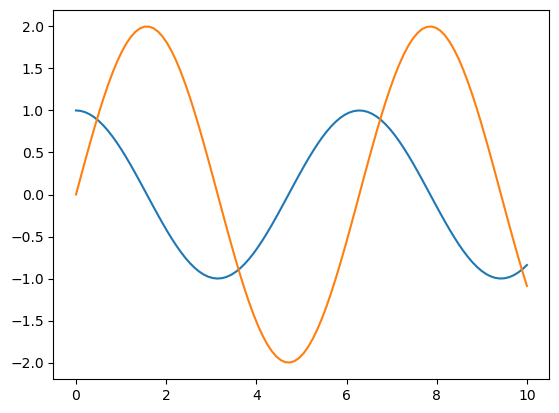

In [67]:
plt.plot(t, Ex[0])
plt.plot(t, Ey[0])

$E_x$ as function of $z$ at $t=0$

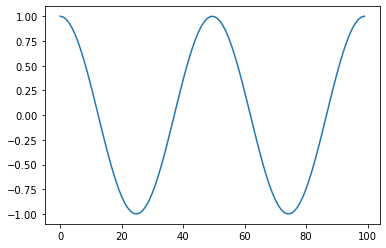

In [93]:
plt.plot(Ex[:,0])

In [94]:
E = np.array([Ex, Ey, Ez])
E = np.swapaxes(E, 0, -1)

In [95]:
B = np.cross(np.array([0,0,1]), E)
E = np.swapaxes(E, 0, -1)
B = np.swapaxes(B, 0, -1)

In [96]:
Bx, By, Bz = B

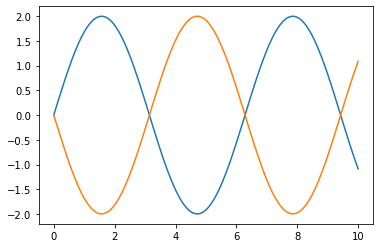

In [97]:
plt.plot(t,Ey[0])
plt.plot(t,Bx[0])

In [101]:
S = np.cross(np.swapaxes(E, 0, -1), np.swapaxes(B, 0, -1))
S = np.swapaxes(S, 0, -1)
Sx, Sy, Sz = S

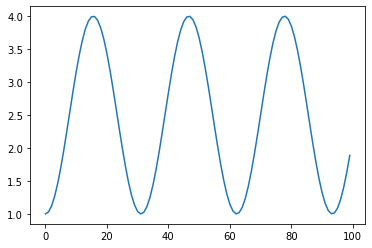

In [104]:
plt.plot(Sz[0])

## Question 4 (tougher)

Find the solutions to $\left(\frac{d^2}{dx^2} + (10x)^2\right) f = \lambda f$ with boundary conditions $f(0)=f(1)=0$

* use the eigenvalue method and the fact that $\frac{d^2 f}{dx^2} \approx \frac{f_{i+1} + f_{i-1} - 2f_i}{\Delta x^2}$ where $f_i = f(i \Delta x)$ and $i$ is an integer. 

In [7]:
N = 1000
x = np.linspace(0,1,N+1)
dx = x[1]-x[0]

main_diag = -2*np.ones(N-1)
off_diag = np.ones(N-2)
derivative_matrix = (np.diag(main_diag) + np.diag(off_diag, k=1)+ np.diag(off_diag, k=-1))/dx**2
x2_matrix = np.diag((10*x[1:-1])**2)
LHS_matrix = derivative_matrix #+ x2_matrix 

In [8]:
w, v = np.linalg.eigh(LHS_matrix)

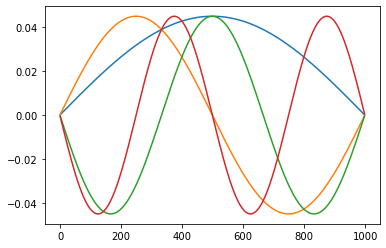

In [9]:
plt.plot(-1*v[:,-1])
plt.plot(-1*v[:,-2])
plt.plot(-1*v[:,-3])
plt.plot(-1*v[:,-4])

In [10]:
w[-1]

-9.869596283366647

In [11]:
np.pi**2

9.869604401089358

In [12]:
w[-2]

-39.4782877254107

In [13]:
(2*np.pi)**2

39.47841760435743

In [112]:
w[-3]

-85.28148111130025

In [14]:
(3*np.pi)**2

88.82643960980423

In [113]:
w[-4]

-151.52596193505596

In [15]:
(4*np.pi)**2

157.91367041742973

# Basic Datasets

In [28]:
data = np.loadtxt('../../input/sample.csv')

ValueError: could not convert string to float: 'ï»¿Person,Height'

In [30]:
data = np.loadtxt('../../input/sample.csv', dtype='object')
data

array(['ï»¿Person,Height', 'Jim,172', 'Mike,168', 'Bob,182', 'Susy,156',
       'Tim,170', 'Frank,190'], dtype=object)

In [31]:
data = np.loadtxt('../../input/sample.csv', dtype='object', delimiter=',')
data

array([['ï»¿Person', 'Height'],
       ['Jim', '172'],
       ['Mike', '168'],
       ['Bob', '182'],
       ['Susy', '156'],
       ['Tim', '170'],
       ['Frank', '190']], dtype=object)

In [32]:
people, heights = np.loadtxt('../../input/sample.csv', dtype='object', delimiter=',', unpack=True)

In [33]:
people

array(['ï»¿Person', 'Jim', 'Mike', 'Bob', 'Susy', 'Tim', 'Frank'],
      dtype=object)

In [34]:
heights

array(['Height', '172', '168', '182', '156', '170', '190'], dtype=object)

In [35]:
people, heights = np.loadtxt('../../input/sample.csv', dtype='object', delimiter=',', unpack=True, skiprows=1)

In [36]:
people

array(['Jim', 'Mike', 'Bob', 'Susy', 'Tim', 'Frank'], dtype=object)

In [37]:
heights

array(['172', '168', '182', '156', '170', '190'], dtype=object)

In [39]:
people = people.astype(str)
heights = heights.astype(float)

In [40]:
people

array(['Jim', 'Mike', 'Bob', 'Susy', 'Tim', 'Frank'], dtype='<U5')

In [41]:
heights

array([172., 168., 182., 156., 170., 190.])